<h1><center>PROYECTO : INDEPENDENCIA EMOCIONAL</center></h1>


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.probability import FreqDist
import nltk
import numpy as np
import statistics as stat
import warnings
from pandas.core.common import SettingWithCopyWarning
import seaborn as sns

Ignorar futuros avisos:

In [2]:
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [3]:
df = pd.read_csv("DEPENDENCIA EMOCIONAL.csv")
df.head(5)

,Timestamp,Sexo,Edad,País,Ocupación,Orientación Sexual,¿Eres segura/seguro de ti mismo?,¿Te sientes segura/seguro estando sola/solo?,¿Dependes de otras personas para animarte a realizar nuevas actividades?,¿Necesitas saber que hay gente que respalda tu opinión para poder expresarla?,...,¿Cuáles fueron las principales razónes por las que fuiste infiel?,"En promedio, ¿Cuánto dinero le dedicas/dedicabas a tu pareja al mes?","En promedio, ¿Cuántas horas a la semana pasas/pasabas con tu pareja?",¿Cuánto ha durado tu relación más larga?,¿Consideras que tu pareja te satisface/satisfizo en todos los ámbitos?,¿Tienes relaciones sexuales con personas que no conoces frecuentemente?,"Tu pareja te amenaza con dejarte porque no quieres mantener relaciones sexuales con ella/él, tú...",¿Consideras la posibilidad de tener hijos?,¿Por qué te gustaría/no te gustaría tener hijos?,¿Cuántos hijos tienes/te gustaría tener?
0,2021/06/15 2:46:13 am GMT-5,Femenino,21,México,Estudiante,Heterosexual,No,Sí,No,No,...,No he sido infiel.,800,8,2 años,No,No,Te niegas y la/lo dejas.,Tal vez,NaN,2
1,2021/06/15 3:17:55 am GMT-5,Masculino,22,Mexico,Programador,Heterosexual,Sí,Sí,No,No,...,No he sido infiel.,2000,20,7 meses,No,Sí,Aceptas pero sabes que gradualmente eso te des...,Sí,Me gusta la idea de tener una familia,3
2,2021/06/15 3:30:24 am GMT-5,Masculino,19,México,Estudiante,Heterosexual,Sí,Sí,No,No,...,No he sido infiel.,1200,35 hrs,1 año 6 meses,Sí,No,Te niegas y la/lo dejas.,Tal vez,En dado caso de que tenga una economía y famil...,2
3,2021/06/15 4:49:35 am GMT-5,Masculino,21,Medico,Trabajador,Heterosexual,No,No,Sí,No,...,Despecho,2000,35,10 meses,Sí,No,Te niegas y la/lo dejas.,Sí,Educar a alguien de bien,2
4,2021/06/15 8:12:45 am GMT-5,Femenino,23,México,Empleado,Heterosexual,No,Sí,No,Sí,...,Me aburría,.,12,1año 6 meses,Sí,No,Te niegas y la/lo dejas.,Sí,Me gustaría experimentar la sensación de ser m...,2


<h1><center>DATA CLEANING/FEATURE INGINEERING</center></h1>
Se analizará columna por columna cuyas respuestas fueron asignadas como abiertas en la encuesta. Es más probable encontrar discrepancias en ellas. Estas columnas fueron las preguntas: <br><br>
1. Edad; <br>
2. País; <br>
3. Ocupación;<br> 
4. Orientación Sexual; <br>
5. ¿Cuántas parejas has tenido en toda tu vida?; <br>
6. En promedio, ¿Cuánto dinero le dedicas/dedicabas a tu pareja al mes?; <br>
7. En promedio, ¿Cuántas horas a la semana pasas/pasabas con tu pareja?;<br>
8. ¿Cuánto ha durado tu relación más larga? <br><br>

No se considerarán las siguientes preguntas abiertas en la sección de arriba, pues se tratan de repuestas personales y opiniones: <br>
1. ¿Qué le dirías a tu ex pareja si la vieras de nuevo?; <br>
2. ¿Cómo sería tu pareja ideal?; <br>
3. ¿Por qué fuiste infiel?; <br>
4. ¿Cuáles fueron las principales razónes por las que fuiste infiel?;<br>
5. ¿Por qué te gustaría/no te gustaría tener hijos?;<br>
6. ¿Cuántos hijos tienes/te gustaría tener? <br>


También existen preguntas no obligatórias. Esto puede repercutir en la información como valores NaN, los cuales tienen que ser sustituidos por algún valor en específico dependiendo de la pregunta. <br>
En muchas de las 42 columnas, la información no esta homogenizada con el mismo tipo de dato: <br><br>
- algunos deberían ser numéricos y contienen rangos; <br>
- otros contienen faltas de ortografía; <br>
- en algunas preguntas se dio la oportunidad de seleccionar más de dos opciones y por lo tanto, hay columnas con varios datos en una misma celda;<br>
- Para trabajar de manera más sencilla y efectiva, se requiere cambiar la mayoría de las variables string a variables ordinales.<br>
- Periodos de tiempo son alfanuméricos en ciertas preguntas. Se necesita homogenizar en una escala conveniente.


In [4]:
#df.dtypes

Se puede apreciar que: <br>
- la columna "Edad" es numérica; por lo tanto, contiene solo valores numéricos. <br>
- la columna "¿Cuántas parejas has tenido en toda tu vida?" es de tipo object cuando debería ser numérica; por lo tanto, contiene carácteres alfanumericos. <br>
- la columna "En promedio, ¿Cuánto dinero le dedicas/dedicabas a tu pareja al mes?", "En promedio, ¿Cuántas horas a la semana pasas/pasabas con tu pareja?" y " ¿Cuánto ha durado tu relación más larga?" presentan el mismo problema con valores alfanumericos.<br>

Se concluye que Edad es la única columna con respuestas abiertas con valores adecuados.

En muchos registros se agregó por alguna razón desconocida un espacio al final de la cadena de texto. Por ello, es necesarío remover esos espacios extra.

In [5]:
stripear = df.select_dtypes(["object"])
df[stripear.columns] = stripear.apply(lambda x: x.str.strip())

También es necesario poner todo en minúsculas.

In [6]:
df[stripear.columns] = stripear.apply(lambda x: x.str.lower())

Es necesario saber en que columnas se deben de manejar valores NaN.

In [7]:
#df.isna().sum()

Columnas Binarias
---
Antes que nada, los diferentes algorítmos de Machine Learning que se utilizarán necesitan valores numéricos. Todas aquellas columnas con valores Sí y No tendrás que ser traducidos a:<br><br>
- Sí será 1
- No será 0

Columnas que tienen valores binários y que deben ser modificados.

In [8]:
binarios = []
for nombre in list(df.columns):
    if "no" and "sí" in list(df[nombre].unique()) :
        binarios.append(nombre)

Hay que cerciorarse de que ninguna de estas columnas tenga NaNsm

In [9]:
df[binarios].isna().sum()

¿Eres segura/seguro de ti mismo?                                                 0
¿Te sientes segura/seguro estando sola/solo?                                     0
¿Dependes de otras personas para animarte a realizar nuevas actividades?         0
¿Necesitas saber que hay gente que respalda tu opinión para poder expresarla?    0
¿Temes por "terminar solo"?                                                      0
¿Actualmente tienes pareja?                                                      0
¿Alguna vez has regresado con una ex pareja?                                     0
¿Alguna vez has sido infiel?                                                     0
¿Alguna vez te han sido infiel?                                                  0
Antes de haber sido infiel, ¿a ti te fueron infiel?                              0
¿Has perdonado alguna infidelidad?                                               0
¿Te han perdonado alguna infidelidad?                                            0
¿Cre

Por lo visto existen 2 valores NaN en la penúltima pregunta; esa pregunta fue abierta. Mi hipótesis es que por miedo o pena esos 2 usuarios no quisieron reconocer la verdad por pudor: Si no tienes relaciones sexuales con personas que no conoces frecuente, entonces sería muy sencillo responder "No". Por lo tanto, los valores NaN en ea columna los voy a sustituir por valores 1.

In [10]:
df["¿Tienes relaciones sexuales con personas que no conoces frecuentemente?"] = df["¿Tienes relaciones sexuales con personas que no conoces frecuentemente?"].fillna(1)

Proseguir haciendo la sustitución entera.

In [11]:
df[binarios] = df[binarios].apply(lambda x : x.replace("no",0).replace("sí",1))

Algunas columnas contenian más valores distintos a "Sí" y "No", modificando así solo esos valores y dejando intactas las otras opciones. Esto no afectará en un futuro, incluso nos adelanta pasos.

Timestamp
--
Dado que la fecha en la que se registró la respuesta de los encuestados no es relevante para el análisis, se optará por eliminarla.

In [12]:
df.drop(columns = "Timestamp",inplace = True)

Sexo
---
Modificar "Feminino" por F y Masculino por M.

In [13]:
df.Sexo = df.Sexo.replace("masculino","M").replace("femenino","F")

País
--
México tiene muchos valores semejantes a "México". Es necesario convertirlos a "México". Existe un valor 54, el cual por conveniencia se sustituira por "México", pues es la moda.   

In [14]:
df.País.value_counts();df.País.unique()

array(['méxico', 'mexico', 'méxico ', 'medico ', 'mexico ', 'brasil ',
       'mejico', 'cdmx', '54', 'chile ', 'méxico tercermundista', 'chile',
       'costa rica', 'argentina', 'los santos'], dtype=object)

In [15]:
def Mexico(x):
    if x == "chile" or x == "brasil" or x == "argentina" or x == "costa rica": 
        return x
    else:
        return "méxico"
        
df.País = df.País.apply(lambda x: Mexico(x))
df.País.unique()

array(['méxico', 'chile', 'costa rica', 'argentina'], dtype=object)

Ocupación
--
Existen profesiones que difieren en el genero. Para una mejor clasificación, solo se ocupará el género masculino. <br>
"Empleado y estudiante" y "Trabajadora dependiente - psicóloga" se compactarán a "Estudiante" y a "Psicólogo"<br>
"Docente" es sinónimo de "Profesor"

In [16]:
df.Ocupación.unique()

array(['estudiante', 'programador', 'trabajador', 'empleado ', 'empleada',
       'empleado y estudiante ', 'ventas', 'modista ', 'taxista',
       'profesora', 'contador', 'actuario', 'asistente ', 'carpintero',
       'profesor', 'empleada ', 'trabajadora dependiente - psicóloga ',
       'docente ', 'empleado', 'repartidor en motocicleta',
       'laboratorista clínico', 'hogar ', 'administradora de empresa',
       'desempleado', 'director de área en desarrollo de software',
       'administradora de empresas', 'medico', 'investigador ',
       'empresario', 'manicurista', 'enfermera '], dtype=object)

In [17]:
df.Ocupación = df.Ocupación.replace("empleado y estudiante","estudiante").replace("trabajadora dependiente - psicóloga","psicólogo").replace("docente","profesor")

No todas las profesiones que terminan en "a" son profesiones con género femeníno. ¿Cuáles son las que sí?  

In [18]:
profesiones = df.Ocupación.replace("empleado y estudiante","estudiante").replace("trabajadora dependiente - psicóloga","psicólogo").unique()
[profesion for profesion in profesiones if profesion.endswith("a")]

['empleada',
 'taxista',
 'profesora',
 'repartidor en motocicleta',
 'administradora de empresa',
 'manicurista']

In [19]:
df.Ocupación = df.Ocupación.replace("empleada","empleado").replace("profesora","profesor").replace("administradora de empresa","administrador").replace("enfermera","enfermero").replace("administradora de empresas","administrador").replace("director de área en desarrollo de software","desarrollador de software")
df.Ocupación.unique()

array(['estudiante', 'programador', 'trabajador', 'empleado ', 'empleado',
       'empleado y estudiante ', 'ventas', 'modista ', 'taxista',
       'profesor', 'contador', 'actuario', 'asistente ', 'carpintero',
       'empleada ', 'trabajadora dependiente - psicóloga ', 'docente ',
       'repartidor en motocicleta', 'laboratorista clínico', 'hogar ',
       'administrador', 'desempleado', 'desarrollador de software',
       'medico', 'investigador ', 'empresario', 'manicurista',
       'enfermera '], dtype=object)

Orientación Sexual
--
Alguna persona agrego la opción "Sin definir" e "Indefinida"; se homogenearizará a "Indefinida". Por el momento se dejará tal cual, pero de ser necesario y conveniente esta podrá incluirse en una clase más general.

In [20]:
df["Orientación Sexual"].replace("sin definir","indefinida").unique()

array(['heterosexual', 'bisexual', 'demisexual', 'homosexual', 'asexual',
       'indefinida', 'pansexual'], dtype=object)

¿Cuántas parejas has tenido en toda tu vida?
--
Por simple inspección, dos cosas resaltan: <br><br>
- al menos 3 tipos de respuestas alfanuméricas están presentes en la columna.
- Existe una respuesta muy larga. Además, dentro de la misma pregunta, hay 2 dos cantidades que hacen referencia a parejas "formales" e "informales".
- El valor "69" puede tratarse de un outlier o de una simple "broma".

In [21]:
df["¿Cuántas parejas has tenido en toda tu vida?"].value_counts()[:5]

4    33
3    33
2    29
1    17
5    15
Name: ¿Cuántas parejas has tenido en toda tu vida?, dtype: int64

Notar que existen dos registro completamente iguales. Quiere decir que pueden existir más de estos. 

In [22]:
df[df["¿Cuántas parejas has tenido en toda tu vida?"] == "estables y formales 5"]

,Sexo,Edad,País,Ocupación,Orientación Sexual,¿Eres segura/seguro de ti mismo?,¿Te sientes segura/seguro estando sola/solo?,¿Dependes de otras personas para animarte a realizar nuevas actividades?,¿Necesitas saber que hay gente que respalda tu opinión para poder expresarla?,"¿Temes por ""terminar solo""?",...,¿Cuáles fueron las principales razónes por las que fuiste infiel?,"En promedio, ¿Cuánto dinero le dedicas/dedicabas a tu pareja al mes?","En promedio, ¿Cuántas horas a la semana pasas/pasabas con tu pareja?",¿Cuánto ha durado tu relación más larga?,¿Consideras que tu pareja te satisface/satisfizo en todos los ámbitos?,¿Tienes relaciones sexuales con personas que no conoces frecuentemente?,"Tu pareja te amenaza con dejarte porque no quieres mantener relaciones sexuales con ella/él, tú...",¿Consideras la posibilidad de tener hijos?,¿Por qué te gustaría/no te gustaría tener hijos?,¿Cuántos hijos tienes/te gustaría tener?
88,F,21,méxico,estudiante,heterosexual,1,1,1,0,0,...,me sentí atraída por alguien más,500,24,un año y 2 meses,1,0,te niegas y la/lo dejas.,1,me gustaría porque me gustan los niños y me em...,4
89,F,21,méxico,estudiante,heterosexual,1,1,1,0,0,...,me sentí atraída por alguien más,500,24,un año y 2 meses,1,0,te niegas y la/lo dejas.,1,me gustaría porque me gustan los niños y me em...,4


Es necesario borrar antes de proseguir este tipo de duplicados. En total, se tienen 10 duplicados y quitandolos no restan 157 registros.

In [23]:
df = df.drop_duplicates(ignore_index = True)

In [24]:
[valor for valor in df["¿Cuántas parejas has tenido en toda tu vida?"] if not valor.isnumeric()]

['"serias" 4',
 'depende. formales? tres. informales? 5. si bien sé que esta pregunta no es el mejor espacio, me gustaría hacer una precisión: sí creo en la monogamia, pero no creo que sea la única dinámica de relación posible ni la más deseable (así como tampoco lo es la poligamia)',
 'estables y formales 5',
 'oficiales 3',
 'ligues cuentan o solo oficialmente?',
 'ninguna']

Estos son los valores que continen valores alfanumericos. Se nota que en la respuesta larga existe un valor string haciendo referencia a un valor numérico. ¿Qúe hacer y qué valor escoger en este caso?<br>
- Dado que la moda es 3 y que la persona reveló que formalmente ha tenido 3 parejas, podemos inferir que el valor más conveniente es 3. Aún más, todos los valores string hacen referencia a parejas formales; esto solo fortalece la asunción.
- O se puede sacar el promedio de 3 y 5, que sería 4, que también es un valor bastante común.<br>

Se optará por la primera opción.

In [25]:
df["¿Cuántas parejas has tenido en toda tu vida?"] = df["¿Cuántas parejas has tenido en toda tu vida?"].replace("depende. formales? tres. informales? 5. si bien sé que esta pregunta no es el mejor espacio, me gustaría hacer una precisión: sí creo en la monogamia, pero no creo que sea la única dinámica de relación posible ni la más deseable (así como tampoco lo es la poligamia)","3")

En el caso de "ligues cuentan o slo oficialmente?" existe una confución por parte del entrevistado (de la cual asumo completa responsabilidad). Como en el caso anterior, será remplazada su respuesta por el valor "3".<br><br>
Además, "ninguno" toma el valor "0".

In [26]:
df["¿Cuántas parejas has tenido en toda tu vida?"] = df["¿Cuántas parejas has tenido en toda tu vida?"].replace("ligues cuentan o solo oficialmente?","3").replace("nnguna","0")

Además, existe un valor 69 caracterizado por ser el máximo. Esto, si bien, puede ser posible, se trata de un valor atípico muy extremo y probablemente es una "broma". Por lo tanto, se ha decidido sustituir ese valor por la moda: 3 

In [27]:
df["¿Cuántas parejas has tenido en toda tu vida?"] = df["¿Cuántas parejas has tenido en toda tu vida?"].replace("69","3")

Para los demas casos, se hará uso de una expresión regular que solamente identifique cifras numéricas. Después se transformará a un tipo de dato _int_.

In [28]:
df["¿Cuántas parejas has tenido en toda tu vida?"].unique()

array(['4', '2', '3', '9', '5', '15', '1', '0', '20', '6', '8', '25',
       '"serias" 4', '10', '7', '11', '13', 'estables y formales 5',
       'oficiales 3', 'ninguna'], dtype=object)

In [29]:
df["¿Cuántas parejas has tenido en toda tu vida?"] = df["¿Cuántas parejas has tenido en toda tu vida?"].str.extract(pat = "([0-9]{1,2})").squeeze()
df["¿Cuántas parejas has tenido en toda tu vida?"] = df["¿Cuántas parejas has tenido en toda tu vida?"].fillna("3").astype("int64")

In [30]:
df["¿Cuántas parejas has tenido en toda tu vida?"].value_counts(sort = False)

0      4
1     13
2     29
3     36
4     31
5     16
6      7
7      7
8      5
9      4
10     4
11     1
13     1
15     1
20     1
25     1
Name: ¿Cuántas parejas has tenido en toda tu vida?, dtype: int64

 En promedio, ¿Cuánto dinero le dedicas/dedicabas a tu pareja al mes?
 --

In [31]:
df["En promedio, ¿Cuánto dinero le dedicas/dedicabas a tu pareja al mes? "].unique()

array(['800', '2000', '1200', '. ', '1000', '$0', '800 pesos',
       '500 aprox', '700', '100', '0', '500', 'ni idea ',
       'no he realizado un estimado ', '0 pesos.',
       'no tengo idea. quiero pensar que a mi actual pareja le dedico unos 1000 pesos mínimo.',
       '300', 'depende de la situación pero son al menos 50 pesos',
       '1,500', '400', '50', '350', '600', '100 pesos', '200',
       '300 pesos', 'hasta 8,000', '50 pesos', '250', '6000', '1500',
       '$500', 'nada', 'no recuerdo', 'no sé', 'entre 200 y 2000',
       '2000 aprox.', '5,000', '1000-1500', '3000', '3mil pesos', '5000',
       '500 pesos', 'no lo sé ', '30000 clp', '2000/3000 pero es mutuo ',
       'unos 700', '$200-$500', 'nada, jaja', '1000 ',
       'hasta unos 12mil pesos mexicanos', 'nada ', '4000', 'más de 1000',
       'compartimos todos los gastos', '50 mil colones de costa rica',
       '3000 ', 'ni idea.', '500 (creo) ', 'cero pesos', '10000',
       'la verdad no tengo ni la cuenta ', '3500'

Detalles a resaltar y modificaciones por hacer:<br><br>
- Muchas respuestas son ambiguas, dejando en claro que no se cuenta con la información demandada. Por lo tanto, se pretende llenar con alguna estadística de tendencia centrar cada uno de ellos. 
- Expresiones como "mil" y "," hacen que algunos números puedan ser mal capturados en el momento de su extracción; por lo tanto, es prioritario modificarlos para poder trabajar con ellos. 
- Existen 2 valores que no están en moneda nacional (MXN). Para ello, se han encontrado sus equivalencias [AQUÍ](https://www.google.com/search?q=convertor+divisas&rlz=1C1CHBF_frMX913MX913&oq=convertor+divisas&aqs=chrome..69i57j0i10l7j0i22i30l2.5631j1j15&sourceid=chrome&ie=UTF-8) .En resumen, a fecha del día de hoy 50000 CRC equivalen a 1648 MXN y 30000 clp equivalen a 824 MXN
- Algunos valores están expresados en rangos: Para ello, se tomará el promedio de ambos extremos de cada rango. 

In [32]:
df["En promedio, ¿Cuánto dinero le dedicas/dedicabas a tu pareja al mes? "] = df["En promedio, ¿Cuánto dinero le dedicas/dedicabas a tu pareja al mes? "].str.replace(r"[$,]","").str.replace("mil","000").str.replace("cero","0").str.replace("50 000 colones de costa rica","1648").str.replace("30000 clp","824")

In [33]:
lista_tuplas = [x for x in df["En promedio, ¿Cuánto dinero le dedicas/dedicabas a tu pareja al mes? "].str.findall(r"\d+ y \d+|\d+[\/-]?\d{1,8}|\d")]

In [34]:
for palabra in lista_tuplas:
    if palabra == []:
        pass
    elif re.search(r"[-\/]| y ",palabra[0]):
        lista = re.findall(r"\d+",palabra[0])
        lista1 = [int(numero) for numero in lista]
        palabra[0] = str(sum(lista1)/len(lista1))

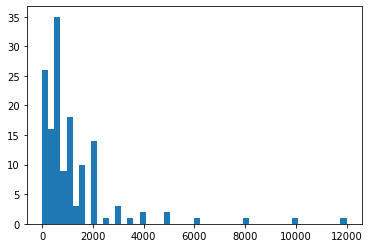

In [35]:
valores_dinero = np.array([float(valor[0]) for valor in lista_tuplas if valor != []])
plt.hist(valores_dinero,bins = 50)
plt.show()

In [36]:
np.mean(valores_dinero),stat.median(valores_dinero),stat.mode(valores_dinero)

(1156.75, 600.0, 500.0)

De acuerdo a lo mostrado por el histograma y por las medidas de disperción central calculadas arriba, se decide aceptar la mediana como valor para reemplazar los valores NaN.

In [37]:
FINAL_dinero = [float(valor[0]) if valor != [] else stat.median(valores_dinero) for valor in lista_tuplas]

In [38]:
df["En promedio, ¿Cuánto dinero le dedicas/dedicabas a tu pareja al mes? "] = FINAL_dinero

---

En promedio, ¿Cuántas horas a la semana pasas/pasabas con tu pareja?
--

In [39]:
df["En promedio, ¿Cuántas horas a la semana pasas/pasabas con tu pareja?"].unique()

array(['8', '20', '35 hrs', '35', '12', '5', '14', '9', '8 horas', '18',
       '10', '0', '15', '30', 'depende mucho de la persona ', '10-15',
       '3.', '5.5', 'actualmente 12', '40', '6', '10 horas', '3', '11',
       'más de 15', '24 a 72 horas', '1 ', '23', '2.5', '7', '5-7', '5 ',
       '50', '90', '33', '4', '2', '24 hrs', '15 ', '24', '48', '24/7',
       'casi diario de 9-9', '21', '64 (virtual) ', '40-50', '5-6',
       '12 horas', '7/7', 'con la última, más de 80hrs', '41',
       'los veia el fin de semana y hablaba con ellos unas 5 hrs a la semana en todas mis  relaciones de pareja',
       '1 o 2', 'todo el día (pandemia)', 'por lo menos 24 hrs',
       'prácticamente diario hablaba con ambas pero en persona creo que de 3 a 4 días a la semana',
       '100', '0.0', '22.5', 'en persona o por texto y llamadas?', 'x'],
      dtype=object)

Es de interes conseguir el número de horas en números. En algunos casos no se expresa explícitamente el número sino un rango de valores (- o a /). <br><br>

- Con una expresión regular se extraeran todos estos elementos.
- En el caso de rangos, se buscará hacer un promedio de ambos valores tanto inferior como superior.
- Algunos casos fueron considerados con tiempo virtual y por tanto las horas representan un valor mayor que el la mediana. Se aceptarán estos valores atípicos, pero en caso de ser necesario serán removidos.
- Aquellos casos en los que no se devolvió un valor numérico se llenarán con el promedio, la media o la moda de toda la serie. En particular y por ambiguedad, el valor "24/7" también asumirá ese mismo valor.

In [40]:
df["En promedio, ¿Cuántas horas a la semana pasas/pasabas con tu pareja?"] = df["En promedio, ¿Cuántas horas a la semana pasas/pasabas con tu pareja?"].str.replace("24/7","")
lista_tuplas =[coin for coin in df["En promedio, ¿Cuántas horas a la semana pasas/pasabas con tu pareja?"].str.findall(r"\d{1,2} [ao] \d{1,2}|\d{1,2}[.\/-]?\d{1,2}|\d")]

Sustituir todos los rangos a sus promedios.

In [41]:
for rango in lista_tuplas:
    if rango == []:
        pass
    elif re.search(r"[-ao/]",rango[0]):
        dos = re.findall(r"\d{1,2}",rango[0])
        if dos[0] == dos[1]:
            rango[0] = "12"
        else:
            dos = [int(x) for x in dos]
            rango[0] = str(sum(dos)/len(dos))

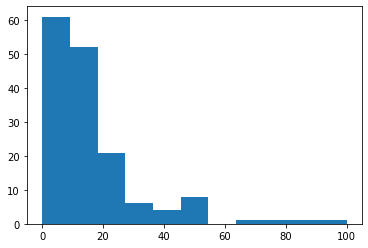

In [42]:
valores = np.array([float(valor[0]) for valor in lista_tuplas if valor != []])
plt.hist(valores,bins = 11)
plt.show()


In [43]:
valores.mean(),np.median(valores),stat.mode(valores)

(15.871794871794872, 11.5, 12.0)

La gráfica de horas tiene un sesgo positivo evidente. Se tomará en cuenta la moda para ser sustituido en los casos en los que no existe información relevante ( [ ] )

In [44]:
for elemento in lista_tuplas:
    if elemento == []:
        elemento.append(stat.mode(valores))

In [45]:
horas_FINAL =[float(x[0]) for x in lista_tuplas]

In [46]:
df["En promedio, ¿Cuántas horas a la semana pasas/pasabas con tu pareja?"] = horas_FINAL

¿Cuánto ha durado tu relación más larga?
--

In [47]:
df["¿Cuánto ha durado tu relación más larga?"].unique()

array(['2 años', '7 meses', '1 año 6 meses ', '10 meses', '1año 6 meses ',
       '9 meses', '1 año y 8 meses. (contando porque es la actual)',
       '3 años ', '4 meses', '1 año y dos meses', '+5 años',
       'un año y siete meses ', '0', '2 meses y medio ', '1 mês ',
       '17 años', '2 años 3 meses ', '2 años ', 'año y medio', '2 meses',
       '1 año y 3 meses ',
       'es la actual, llevo 1 año 10 meses de relación', '1 año 8 meses',
       '5 años ', '1 año y x meses', '1 año 8 meses ', '3 años',
       '1 año 10 meses', '6 meses', '11 meses ', '1 año y 8 meses ',
       '4 años', '3 qñosv', '7 meses ', '9 meses ', '3 meses',
       '3 años 5 meses ', 'cuatro meses', 'casi 5 años', '29 años ',
       '1 año ', '25 años', '6 años', '3 meses ', '3 años y medio',
       '35 años', '5 meses.', 'un año ', '1 año 1 mes ', '5 años',
       '1año 9 meses ', '3 años 4 meses', '3años y 5meses', '4 años ',
       'quince meses', 'dos años y medio', '16 meses', '1 año', '8 meses',
      

- La información está muy sucia. Para empezar, es claro que la información contiene strings, esto principalmente por la poca especificación al entrevistado sobre proveer los resultados en meses (numérico). A simple vista se puede ver que algunas personas utilizaron el nombre literal del número de meses o años. Es necesario ver que palábras contienen la información literal. Por convención, he decidido dejar los resultados en meses, es decir : 1 año 3 meses serán 15 meses. <br>
- Además, hay ciertas respuestas que no contienen información relevante; por lo tanto, he decidio llenar esos lugares vacíos con la media de todos los resultados numéricos.

In [48]:
tiempo_relacion = " ".join(df["¿Cuánto ha durado tu relación más larga?"])
tokens = nltk.word_tokenize(tiempo_relacion)

In [49]:
freq = FreqDist(tokens);freq.keys()

dict_keys(['2', 'años', '7', 'meses', '1', 'año', '6', '10', '1año', '9', 'y', '8', '.', '(', 'contando', 'porque', 'es', 'la', 'actual', ')', '3', '4', 'dos', '+5', 'un', 'siete', '0', 'medio', 'mês', '17', ',', 'llevo', 'de', 'relación', '5', 'x', '11', 'qñosv', 'cuatro', 'casi', '29', '25', '35', 'mes', '3años', '5meses', 'quince', '16', 'en', 'términos', 'formales', '?', 'considerando', 'lapsos', 'informal', 'complicado', 'definir', 'no', 'hay', 'consenso', 'con', 'otra', 'persona', 'pero', 'desde', 'mi', 'concepción', 'fueron', 'poco', 'menos', 'una', 'semana', '22', '8años', '19', 'tres', 'llevomos', '32', 'juntos', '4años', 'cinco', 'sigue', 'como'])

In [50]:
palabras = [palabra for palabra in list(freq.keys()) if not palabra.isnumeric()]

Sustituiré todas las palabras que necesitan ser modificadas manualmente.

In [51]:
df["¿Cuánto ha durado tu relación más larga?"] = df["¿Cuánto ha durado tu relación más larga?"].str.replace("medio","6 meses").str.replace("siete","7").str.replace("cinco","5").str.replace("tres","3").str.replace("4años","4 años").str.replace("8años","8 años").str.replace("una","1").str.replace("un","1").str.replace("quince","15").str.replace("5meses","5 meses").str.replace("3años","3 años").str.replace("cuatro","4").str.replace("qñosv","años").str.replace("mês","mes").str.replace("\+5","5").str.replace("dos","2").str.replace("1año","1 año")

La respuesta larga voy a resumirla a el tiempo el cual el entervistado asegura: 2 años 6 meses

In [52]:
df[df["¿Cuánto ha durado tu relación más larga?"] == 'en términos formales? 4 meses y 6 meses. considerando lapsos de relación informal? es complicado definir porque no hay 1 consenso con la otra persona, pero desde mi concepción fueron poco menos de 2 años y 6 meses']

,Sexo,Edad,País,Ocupación,Orientación Sexual,¿Eres segura/seguro de ti mismo?,¿Te sientes segura/seguro estando sola/solo?,¿Dependes de otras personas para animarte a realizar nuevas actividades?,¿Necesitas saber que hay gente que respalda tu opinión para poder expresarla?,"¿Temes por ""terminar solo""?",...,¿Cuáles fueron las principales razónes por las que fuiste infiel?,"En promedio, ¿Cuánto dinero le dedicas/dedicabas a tu pareja al mes?","En promedio, ¿Cuántas horas a la semana pasas/pasabas con tu pareja?",¿Cuánto ha durado tu relación más larga?,¿Consideras que tu pareja te satisface/satisfizo en todos los ámbitos?,¿Tienes relaciones sexuales con personas que no conoces frecuentemente?,"Tu pareja te amenaza con dejarte porque no quieres mantener relaciones sexuales con ella/él, tú...",¿Consideras la posibilidad de tener hijos?,¿Por qué te gustaría/no te gustaría tener hijos?,¿Cuántos hijos tienes/te gustaría tener?
84,M,21,méxico,estudiante,bisexual,0,1,0,1,0,...,"el deseo de tener más experiencias, con otras ...",600.0,10.0,en términos formales? 4 meses y 6 meses. consi...,1,0,aceptas pero sabes que gradualmente eso te des...,tal vez,por mi parte me da curiosidad saber cómo sería...,"0 o 1. si mi(s) pareja(s) deseara(n) más, podr..."


In [53]:
df.at[86,"¿Cuánto ha durado tu relación más larga?"] = "2 años y 6 meses"

Pretendo hacer lo siguiente:<br><br>
- Haré por fuera del DataFrame principal dos lista: una que tenga el número de años y otra que tenga el número de meses. Existe un registro con 1 semana de relación el cual se reducira a cero (1/4 = .25 ~0). <br>
- Con la columna "años", el valor lo multiplicaré por 12 (12 meses en un año) y estos se sumarán a la columna "meses", la cual contendrá todas las fracciones de año (meses) de cada relación.<br>
- Con esto busco homogenizar el tiempo entre relaciones.

In [54]:
df["¿Cuánto ha durado tu relación más larga?"].unique()

array(['2 años', '7 meses', '1 año 6 meses ', '10 meses', '9 meses',
       '1 año y 8 meses. (contando porque es la actual)', '3 años ',
       '4 meses', '1 año y 2 meses', '5 años', '1 año y 7 meses ', '0',
       '2 meses y 6 meses ', '1 mes ', '17 años', '2 años 3 meses ',
       '2 años ', 'año y 6 meses', '2 meses', '1 año y 3 meses ',
       'es la actual, llevo 1 año 10 meses de relación', '1 año 8 meses',
       '5 años ', '1 año y x meses', '1 año 8 meses ', '3 años',
       '1 año 10 meses', '6 meses', '11 meses ', '1 año y 8 meses ',
       '4 años', '7 meses ', '9 meses ', '3 meses', '3 años 5 meses ',
       'casi 5 años', '29 años ', '1 año ', '25 años', '6 años',
       '3 meses ', '3 años y 6 meses', '35 años', '5 meses.',
       '1 año 1 mes ', '1 año 9 meses ', '3 años 4 meses',
       '3 años y 5 meses', '4 años ', '15 meses', '2 años y 6 meses',
       '16 meses', '1 año', '8 meses', '6 meses año. ', '16 años',
       'en términos formales? 4 meses y 6 meses. cons

La siguiente lista de comprehesión devulve el numero de años que hay en cada registro. Por separado y dentro de una tupla, tiene por datos el número de años y la palabra "años". Existen registros [] las cuales son aquellos que __NO__ tienen años en absoluto, \[[,"año(s)]\] son aquellos que por error los entrevistados no digitaron el número 1 (se asume) y decidieron poner solo "año y ..."

In [55]:
lista_tuplas =[coin for coin in df["¿Cuánto ha durado tu relación más larga?"].str.findall(r"(\d{1,2} )?(año|años)\b")]

- Se asume que los valores [] no tienen años (valor 0)<br>
- Los valores "" tienen valor 1

In [56]:
lista_años = []
for palabra in df["¿Cuánto ha durado tu relación más larga?"]:
    if re.findall(r"(\d{1,2} )?(año|años)\b",palabra) == []:
        lista_años.append("0")
    else:
        lista_años.append(re.findall(r"(\d{1,2} )?(año|años)\b",palabra)[0][0])
lista_años = [palabra.strip() for palabra in lista_años ]
lista_años = ["1" if palabra == "" else palabra for palabra in lista_años]

Implementar el mismo algoritmo pero con los meses. Existe un registro que por error "2 meses 6 meses" fueron proporcionados como respuesta. Por simplicidad, este se asumirá como un registro "2 meses"

In [57]:
lista_tuplas_meses =[coin for coin in df["¿Cuánto ha durado tu relación más larga?"].str.findall(r"([\d]{1,2} )?(mes|meses)\b")]

In [58]:
lista_meses = []
for palabra in df["¿Cuánto ha durado tu relación más larga?"]:
    if re.findall(r"([\d]{1,2} )?(mes|meses)\b",palabra) == []:
        lista_meses.append("0")
    else:
        lista_meses.append(re.findall(r"([\d]{1,2} )?(mes|meses)\b",palabra)[0][0])
lista_meses = [palabra.strip() for palabra in lista_meses]
lista_meses = ["1" if palabra == "" else palabra for palabra in lista_meses]

Así es como se verían los datos (DataFrame de muestra)

In [59]:
provi_relacion = pd.DataFrame({"años_tuplas":lista_tuplas,"años":lista_años,"meses_tuplas":lista_tuplas_meses,"meses":lista_meses})
provi_relacion.tail(10)

,años_tuplas,años,meses_tuplas,meses
151,"[(2 , años)]",2,[],0
152,"[(3 , años)]",3,"[(6 , meses)]",6
153,"[(4 , años)]",4,[],0
154,"[(1 , año)]",1,[],0
155,"[(3 , años)]",3,[],0
156,[],0,"[(6 , meses)]",6
157,[],0,"[(4 , meses)]",4
158,"[(3 , años)]",3,[],0
159,"[(2 , años)]",2,"[(6 , meses)]",6
160,[],0,[],0


Para trabajar de manera más sencilla las operaciones entre vectores, convertiré las listas a Series.

In [60]:
años_array = pd.Series(lista_años,dtype = "int64")
meses_array = pd.Series(lista_meses,dtype = "int64")
FINAL_relaciones = años_array * 12 + meses_array
df["¿Cuánto ha durado tu relación más larga?"] = FINAL_relaciones.astype("int64")
df.head(5)

C:\Users\actda\anaconda3\lib\site-packages\numpy\core\numeric.py:2327: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


,Sexo,Edad,País,Ocupación,Orientación Sexual,¿Eres segura/seguro de ti mismo?,¿Te sientes segura/seguro estando sola/solo?,¿Dependes de otras personas para animarte a realizar nuevas actividades?,¿Necesitas saber que hay gente que respalda tu opinión para poder expresarla?,"¿Temes por ""terminar solo""?",...,¿Cuáles fueron las principales razónes por las que fuiste infiel?,"En promedio, ¿Cuánto dinero le dedicas/dedicabas a tu pareja al mes?","En promedio, ¿Cuántas horas a la semana pasas/pasabas con tu pareja?",¿Cuánto ha durado tu relación más larga?,¿Consideras que tu pareja te satisface/satisfizo en todos los ámbitos?,¿Tienes relaciones sexuales con personas que no conoces frecuentemente?,"Tu pareja te amenaza con dejarte porque no quieres mantener relaciones sexuales con ella/él, tú...",¿Consideras la posibilidad de tener hijos?,¿Por qué te gustaría/no te gustaría tener hijos?,¿Cuántos hijos tienes/te gustaría tener?
0,F,21,méxico,estudiante,heterosexual,0,1,0,0,0,...,no he sido infiel.,800.0,8.0,24,0,0,te niegas y la/lo dejas.,tal vez,NaN,2
1,M,22,méxico,programador,heterosexual,1,1,0,0,0,...,no he sido infiel.,2000.0,20.0,7,0,1,aceptas pero sabes que gradualmente eso te des...,1,me gusta la idea de tener una familia,3
2,M,19,méxico,estudiante,heterosexual,1,1,0,0,0,...,no he sido infiel.,1200.0,35.0,18,1,0,te niegas y la/lo dejas.,tal vez,en dado caso de que tenga una economía y famil...,2
3,M,21,méxico,trabajador,heterosexual,0,0,1,0,1,...,despecho,2000.0,35.0,10,1,0,te niegas y la/lo dejas.,1,educar a alguien de bien,2
4,F,23,méxico,empleado,heterosexual,0,1,0,1,1,...,me aburría,600.0,12.0,18,1,0,te niegas y la/lo dejas.,1,me gustaría experimentar la sensación de ser m...,2


---

¿Consideras la posibilidad de tener hijos?
---


Esta columna contiene 3 valores: <br>
- 1: Sí
- 0: No
- 2: Tal vez

El valor "Tal vez" tiene que ser sustituido por el valor 2 para posteriormente poder trabajar con él.

In [61]:
df["¿Consideras la posibilidad de tener hijos?"].mask(df["¿Consideras la posibilidad de tener hijos?"] == "tal vez",2, inplace = True)

¿Te han perdonado alguna infidelidad?
---

Esta columna contiene 3 valores: <br>
- 1: Sí
- 0: No
- 2: no he sido infiel

El valor "no he sido infiel" tiene que ser sustituido por el valor 2 para posteriormente poder trabajar con él.

In [62]:
df["¿Te han perdonado alguna infidelidad?"].mask(df["¿Te han perdonado alguna infidelidad?"] == "no he sido infiel.",2, inplace = True)

¿Has perdonado alguna infidelidad?
---

Esta columna contiene 3 valores: <br>
- 1: Sí
- 0: No
- 2: no me han sido infiel.

El valor "no me han sido infiel" tiene que ser sustituido por el valor 2 para posteriormente poder trabajar con él.

In [63]:
df["¿Has perdonado alguna infidelidad?"].mask(df["¿Has perdonado alguna infidelidad?"] == "no me han sido infiel.",2, inplace = True)

Antes de haber sido infiel, ¿a ti te fueron infiel?
---

Esta columna contiene 3 valores: <br>
- 1: Sí
- 0: No
- 2: no he sido infiel.
- 3: me han sido infiel y después de ello yo no he sido infiel.

El valor "no me han sido infiel" tiene que ser sustituido por el valor 2 para posteriormente poder trabajar con él.

In [64]:
df["Antes de haber sido infiel, ¿a ti te fueron infiel?"].mask(df["Antes de haber sido infiel, ¿a ti te fueron infiel?"] == "no he sido infiel.",2, inplace = True)
df["Antes de haber sido infiel, ¿a ti te fueron infiel?"].mask(df["Antes de haber sido infiel, ¿a ti te fueron infiel?"] == "me han sido infiel y depués de ello yo no he sido infiel.",3, inplace = True)

Tu pareja te amenaza con dejarte porque no quieres mantener relaciones sexuales con ella/él, tú...
---

Esta columna contiene 4 valores: <br>
- 0: te niegas y la/lo dejas.
- 1: aceptas pero sabes que gradualmente eso te desgastará y terminarás dejandola/dejandolo.
- 2: te niegas pero tratas de convencerla/convencerlo de que la amas/lo amas.
- 3: aceptas por miedo a que te deje.


In [65]:
df["Tu pareja te amenaza con dejarte porque no quieres mantener relaciones sexuales con ella/él, tú..."].mask(df["Tu pareja te amenaza con dejarte porque no quieres mantener relaciones sexuales con ella/él, tú..."] == "te niegas y la/lo dejas.",0, inplace = True)
df["Tu pareja te amenaza con dejarte porque no quieres mantener relaciones sexuales con ella/él, tú..."].mask(df["Tu pareja te amenaza con dejarte porque no quieres mantener relaciones sexuales con ella/él, tú..."] == "aceptas pero sabes que gradualmente eso te desgastará y terminarás dejandola/dejandolo.",1, inplace = True)
df["Tu pareja te amenaza con dejarte porque no quieres mantener relaciones sexuales con ella/él, tú..."].mask(df["Tu pareja te amenaza con dejarte porque no quieres mantener relaciones sexuales con ella/él, tú..."] == "te niegas pero tratas de convencerla/convenserlo de que la amas/lo amas.",2, inplace = True)
df["Tu pareja te amenaza con dejarte porque no quieres mantener relaciones sexuales con ella/él, tú..."].mask(df["Tu pareja te amenaza con dejarte porque no quieres mantener relaciones sexuales con ella/él, tú..."] == "te niegas pero tratas de convencerla/convencerlo de que la amas/lo amas.",2, inplace = True)
df["Tu pareja te amenaza con dejarte porque no quieres mantener relaciones sexuales con ella/él, tú..."].mask(df["Tu pareja te amenaza con dejarte porque no quieres mantener relaciones sexuales con ella/él, tú..."] == "aceptas por miedo a que te deje.",3, inplace = True)

Existen valores Nan, estos deberán ser sustituidos por la moda. Como puede verse, la moda es 0.

In [66]:
df["Tu pareja te amenaza con dejarte porque no quieres mantener relaciones sexuales con ella/él, tú..."].value_counts()

0    94
2    37
1    19
3     4
Name: Tu pareja te amenaza con dejarte porque no quieres mantener relaciones sexuales con ella/él, tú..., dtype: int64

In [67]:
df["Tu pareja te amenaza con dejarte porque no quieres mantener relaciones sexuales con ella/él, tú..."].fillna(0,inplace = True)

¿Cuántos hijos tienes/te gustaría tener?
---

In [68]:
df["¿Cuántos hijos tienes/te gustaría tener?"].unique()

array(['2', '3', '1', '2-4', 'ninguno', '0', 'tengo 2',
       'me gustaría tener 2-3 ', '2 ', '1 ', '0 ', 'ninguno ', '2-3', '5',
       'máximo 3', 'ningunx', 'si lo decidiera, dos.',
       'no quisiera tener. ', '1 o 2', 'no tengo hijos', '3 ',
       'una pregunta difícil, considero debe ser planteada en un par de años cuando decida tener hijos y consultarlo con mi pareja pero si fuera por mí tendría 1 o dos por si el primero es niña jaja no es cierto quiero tener al menos 2 hijos.',
       'si llego a tener me gustaría que solo fuera uno',
       '0 o 1. si mi(s) pareja(s) deseara(n) más, podríamos dialogar al respecto y apoyaría con pleno deseo y acuerdo hasta 2, pero no es mi ideal',
       '20', '4', '1, tal vez 2 ', 'dos o tres ', ' no',
       'si llego a tener, uno o dos. si yo llegara a faltar, no quisiera que se quedaran sin alguien más en el mundo',
       '1-2', '1/2', 'hasta 4', '0-1', 'ninguno, jaja', '2 máx.',
       '4 máximo, incluyendo al que ya tengo.', '2 hijos'

Existen algunas complicaciones para extraer los datos numéricos:<br>
- Existen valores numéricos expresados en su forma literária (dos, tres, uno) Estos se cambiaran a su forma numérica.
- Existen intervalos de hijos deseados. Considero que obtener la cota máxima de cada intervalo es la mejor opción para trabajar con este tipo de información. 
- La negación a tener hijos equivale a 0 hijos.

In [69]:
df["¿Cuántos hijos tienes/te gustaría tener?"] = df["¿Cuántos hijos tienes/te gustaría tener?"].str.replace("dos","2").str.replace("tres","3").str.replace("uno","1").str.replace("ning1","0")

Al hacer la sustitución de "uno" por "1", la palabra "ninguno" fue sustituida por error a "ning1". Es por eso que se agregó el replace con el respectivo parámetro.

In [70]:
numero_hijos = [x for x in df["¿Cuántos hijos tienes/te gustaría tener?"].str.findall("\d")]
for x in numero_hijos:
    if x == []:
        x.append("0")
numero_hijos_FINAL = [int(max(x)) for x in numero_hijos]
df["¿Cuántos hijos tienes/te gustaría tener?"] = numero_hijos_FINAL

De las siguientes características, ¿con cuáles te identificas?
---

In [71]:
df["De las siguientes características, ¿con cuáles te identificas? "].unique()[:5]

array(['baja autoestima.;estado de ánimo disfórico.;lugar prioritario de la relación.;autoanulación.;necesidad de agradar.;deseos de exclusividad.',
       'déficit de habilidades sociales', 'deseos de exclusividad.',
       'miedo a la soledad.;necesidad de agradar.;deseos de exclusividad.',
       'baja autoestima.'], dtype=object)

- Se eliminarán los puntos para no cargar con carácteres innecesarios.
- Se separaran las caracteríticas por ;

Lista de características.

In [72]:
caracteristicas = ["baja autoestima","miedo a la soledad","estado de ánimo disfórico","lugar prioritario de la relación",
                   "necesidad de acceso continuo al compañero","autoanulación","necesidad de agradar","deseos de exclusividad",
                   "déficit de habilidades sociales","ocupar un papel inferior en la relación de pareja"]

In [73]:
for carac in caracteristicas:
    df[carac] = np.where(df["De las siguientes características, ¿con cuáles te identificas? "].str.contains(carac),1,0)
df.drop(columns = "De las siguientes características, ¿con cuáles te identificas? ",inplace = True)

---

DATA FRAME TERMINADO
---

In [74]:
df.head(5)

,Sexo,Edad,País,Ocupación,Orientación Sexual,¿Eres segura/seguro de ti mismo?,¿Te sientes segura/seguro estando sola/solo?,¿Dependes de otras personas para animarte a realizar nuevas actividades?,¿Necesitas saber que hay gente que respalda tu opinión para poder expresarla?,"¿Temes por ""terminar solo""?",...,baja autoestima,miedo a la soledad,estado de ánimo disfórico,lugar prioritario de la relación,necesidad de acceso continuo al compañero,autoanulación,necesidad de agradar,deseos de exclusividad,déficit de habilidades sociales,ocupar un papel inferior en la relación de pareja
0,F,21,méxico,estudiante,heterosexual,0,1,0,0,0,...,1,0,1,1,0,1,1,1,0,0
1,M,22,méxico,programador,heterosexual,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,M,19,méxico,estudiante,heterosexual,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,M,21,méxico,trabajador,heterosexual,0,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0
4,F,23,méxico,empleado,heterosexual,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0


In [75]:
df.dtypes

Sexo                                                                                                                    object
Edad                                                                                                                     int64
País                                                                                                                    object
Ocupación                                                                                                               object
Orientación Sexual                                                                                                      object
¿Eres segura/seguro de ti mismo?                                                                                         int64
¿Te sientes segura/seguro estando sola/solo?                                                                             int64
¿Dependes de otras personas para animarte a realizar nuevas actividades?                                       

<h1><center>EXPLOTATORY DATA ANALYSIS</center></h1>

En este proyecto se espera tener dos grendes resultados principales:<br>
- Análsis de sentimientos.
- Aplicar algorírmos de clasificación y de regresión.

Para esto, dividiré primeramente la base de datos en 2 partes: La primera será unicamente utilizada para realizar el Análsis de sentimientos y la segunda será el resto de las columas.<be>
    
__df_sentimientos__: Este data frame contendrá todas las columnas destinadas a esta tarea. Las columnas a seleccionar son: <br>
- Sexo
- Edad
- ¿Qué le dirías a tu ex pareja si la vieras de nuevo? 
- ¿Cómo sería tu pareja ideal?
- ¿Por qué fuiste infiel?
- ¿Cuáles fueron las principales razónes por las que fuiste infiel?
- ¿Por qué te gustaría/no te gustaría tener hijos?

__df_numericos__: Todos las columnas que restan.


In [103]:
df_sentimientos = df[["Sexo","Edad","¿Qué le dirías a tu ex pareja si la vieras de nuevo?","¿Cómo sería tu pareja ideal?","¿Por qué fuiste infiel?","¿Cuáles fueron las principales razónes por las que fuiste infiel?","¿Por qué te gustaría/no te gustaría tener hijos?"]]
df_numericos = pd.concat([df[df.columns.difference(df_sentimientos.columns)],df["Sexo"],df["Edad"]],axis = 1)

In [104]:
df_numericos

,¿Qué tanto estás dispuesto a soportar maltrato físico o psicológico con tal de que una persona se quede a tu lado?,"Antes de haber sido infiel, ¿a ti te fueron infiel?","Cuando estás en una relación, ¿Qué tan a menudo sientes de forma espontánea que la relación va a acabar?","En promedio, ¿Cuántas horas a la semana pasas/pasabas con tu pareja?","En promedio, ¿Cuánto dinero le dedicas/dedicabas a tu pareja al mes?",Eres buena/bueno mintiendo,Ocupación,Orientación Sexual,País,Te aburres fácilmente.,...,¿Dependes de otras personas para animarte a realizar nuevas actividades?,¿Eres segura/seguro de ti mismo?,¿Has perdonado alguna infidelidad?,¿Necesitas saber que hay gente que respalda tu opinión para poder expresarla?,¿Te han perdonado alguna infidelidad?,¿Te sientes segura/seguro estando sola/solo?,"¿Temes por ""terminar solo""?",¿Tienes relaciones sexuales con personas que no conoces frecuentemente?,Sexo,Edad
0,3,3,4,8.0,800.0,2,estudiante,heterosexual,méxico,2,...,0,0,0,0,2,1,0,0,F,21
1,1,2,1,20.0,2000.0,5,programador,heterosexual,méxico,1,...,0,1,2,0,2,1,0,1,M,22
2,1,3,1,35.0,1200.0,5,estudiante,heterosexual,méxico,5,...,0,1,0,0,2,1,0,0,M,19
3,2,1,3,35.0,2000.0,5,trabajador,heterosexual,méxico,3,...,1,0,1,0,0,0,1,0,M,21
4,1,0,2,12.0,600.0,5,empleado,heterosexual,méxico,4,...,0,0,1,1,1,1,1,0,F,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,3,2,5,22.5,900.0,4,estudiante,heterosexual,méxico,5,...,0,0,0,1,2,1,0,0,M,20
157,2,1,3,12.0,600.0,3,estudiante,heterosexual,méxico,5,...,1,1,0,0,0,1,0,0,M,18
158,3,2,2,50.0,1500.0,3,enfermera,heterosexual,méxico,3,...,1,1,0,0,2,1,0,0,F,26
159,1,0,2,12.0,800.0,4,estudiante,bisexual,méxico,4,...,0,1,0,0,0,1,1,0,F,21


Por el momento, solo se trabajará con df_numericos.

In [78]:
#df_numericos.describe().T

Proporción de Sexo
---
Existe una proporción mayor en la base de datos en cuanto mujeres comparada a la de hombres.

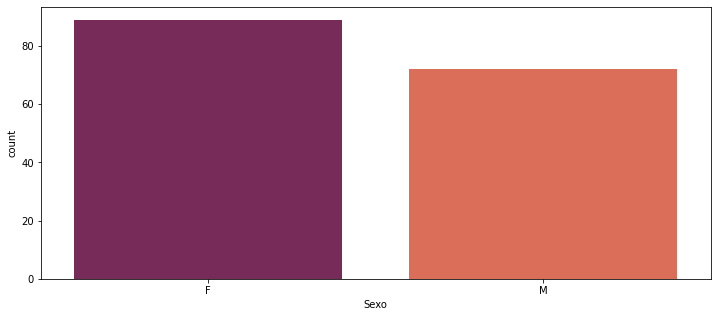

In [135]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
sns.countplot(x = df_numericos["Sexo"], data = df_numericos, palette = "rocket")

Proporción de Ocupación
---
La mayoría de personas son estudiantes.

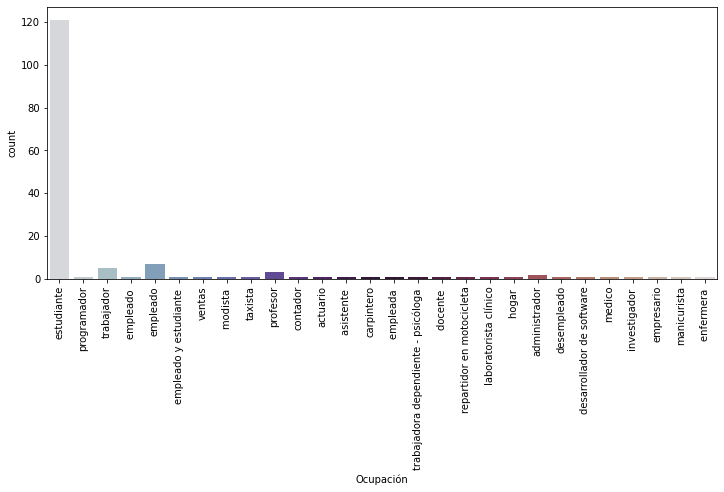

In [130]:
fig, ax = plt.subplots()
plt.xticks(rotation = "vertical")
fig.set_size_inches(12,5)
sns.countplot(x = df_numericos["Ocupación"], data = df_numericos, palette ='twilight')

Proporción de Edad
---
Las gráficas revelan un sesgo negativo bastante prolongado, con una curtosis exagerada además de una cola derecha muy extendida. Esto puede deberse a:<br>
- Se tiene la presencia de algunos _outliers_ que, por el momento, no es necesario retirar.
- La mayoría de personas fueron estudiantes, por lo tanto, la moda es demasiada grande y por lo tanto la curtosis incrementa.

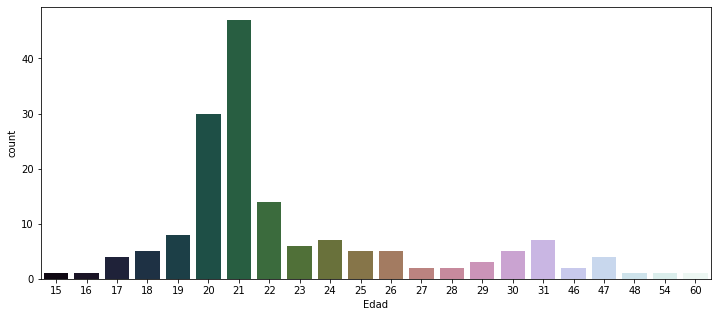

In [132]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
sns.countplot(x = df_numericos["Edad"], data = df_numericos, palette = "cubehelix")

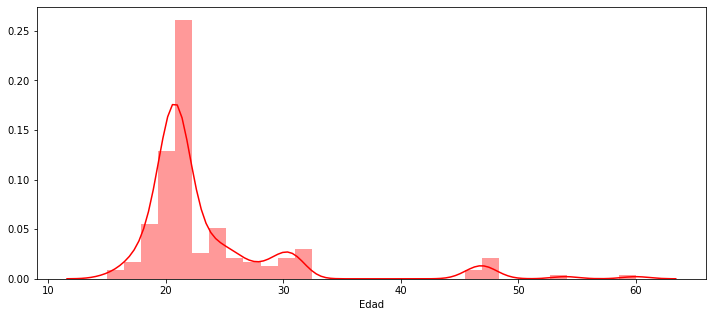

In [133]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
sns.distplot(df_numericos["Edad"], color = "r")

Proporción Edad/Sexo
---
Es visible la diferencia entre mujeres y hombres en los datos.

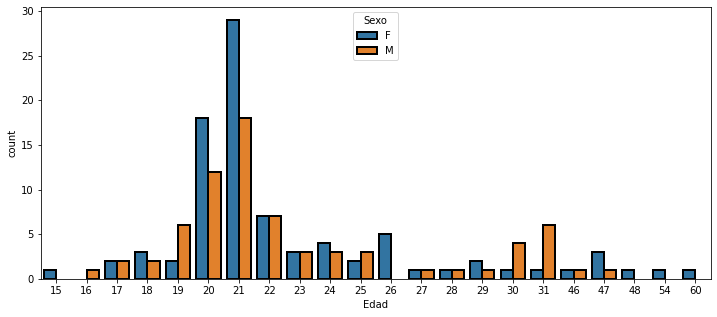

In [140]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
sns.countplot(x = "Edad",hue = "Sexo",data = df_numericos,edgecolor =(0,0,0),linewidth = 2)

¿Qué Sexo tiene (en proporción) más baja autoestima?
---
Por una diferencia bastante considerable y por medio de un contraste entre ambos casos, podemos asegurar que los hombres tienen, en promedio, mayor seguridad que las mujeres. (Acorde a lo resumida EN ESTA BASE DE DATOS)

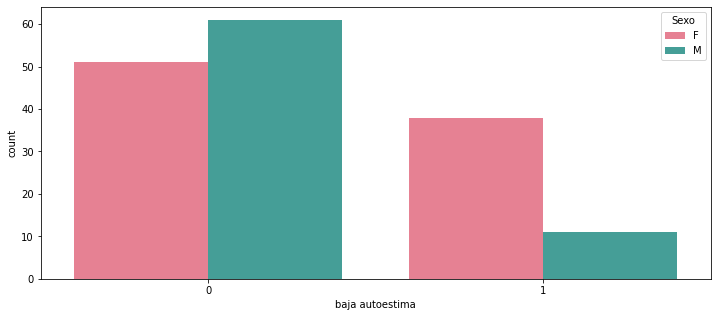

In [142]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
sns.countplot(x= df["baja autoestima"], hue = "Sexo", data = df_numericos, palette ="husl" )

¿Qué Sexo es más celoso?
---
Los hombres se mantienen neutral en cuanto a sus celos; sin embargo, las mujeres suelen tener dos umbrales : aquellas que no son celosas y en una menor proporción, aquella que son muy celosas. La gráfica nos revela que la cantidad de hombres muy celosos es muy baja.

Text(0, 0.5, 'Número de personas')

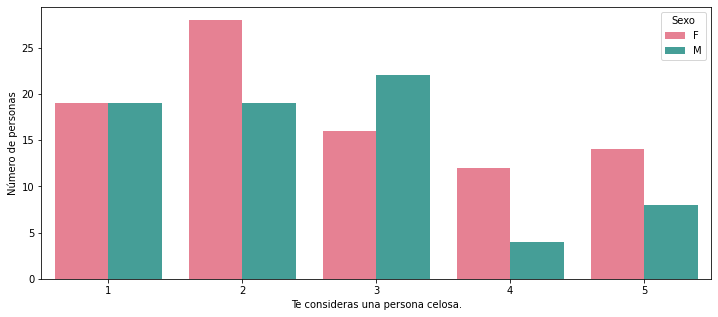

In [154]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
p = sns.countplot(x= df["Te consideras una persona celosa."], hue = "Sexo", data = df_numericos, palette ="husl" )
p.set_ylabel("Número de personas")

¿Tiene la orientación sexual algo que ver con respecto a los celos?
---
Tomando en cuenta que la base de datos muestra muchos registros de personas heterosexuales no es correcto hacer comparaciones entre orientaciones sexuales; sin embargo, sí que se pueden concluir algunas cosas entre mismas categorías: <br>
- Las personas heterosexuales suelen ser muy celosas, pues las dos categorías con más umbral de celos están disparadas.
- Lo mismo puede concluirde de los homosexuales.
- Generalizando (solo para motivos de la investigación) quienes no se identifican con alguna de las categorías (indefinidos) son muy celosos, posicionandose todos en el quinto nivel.


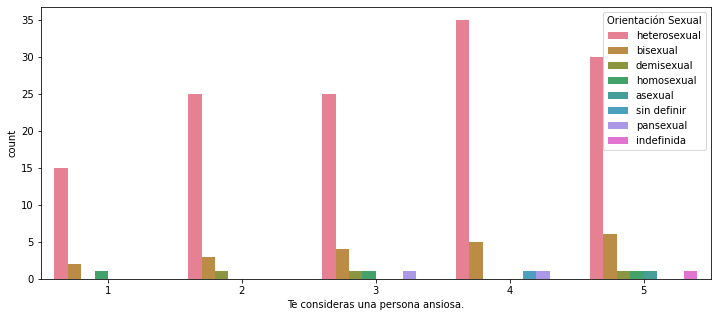

In [160]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
sns.countplot(x= df["Te consideras una persona ansiosa."], hue = "Orientación Sexual", data = df_numericos, palette ="husl" )

¿Qué Sexo tiende a ser más infiel?
---
Considerando que hay un número de registros mucho mayor de mujeres que de hombres, ambos Sexos tienden a ser igual tanto infieles como fieles. 

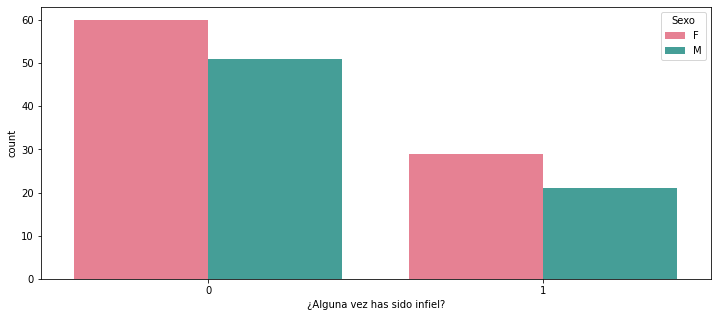

In [161]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
sns.countplot(x= df["¿Alguna vez has sido infiel?"], hue = "Sexo", data = df_numericos, palette ="husl" )

¿Qué Sexo tiene relaciones más duraderas?
---
Es claro que las mujeres tienen relaciones más duraderas, teniendo casos extremos de llegar a más de 40 meses. Probablemente estas relaciones son no noviazgos sino matrimonios. En general, la mediana de las mujeres es mayor que a la de los hombres.

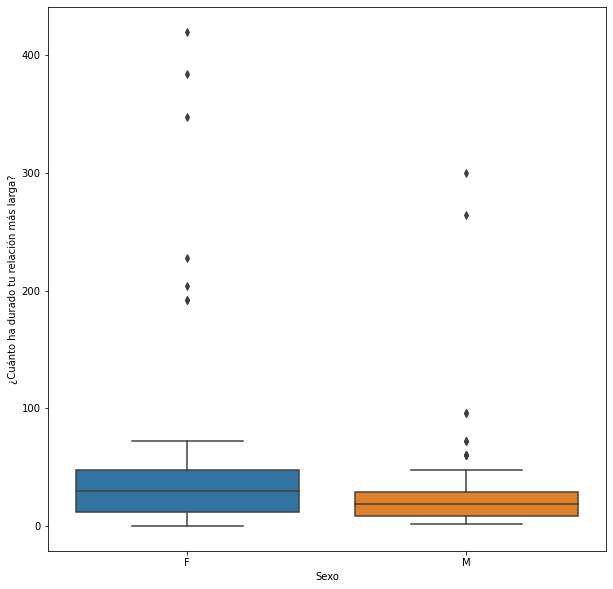

In [173]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.boxplot(x = "Sexo", y = "¿Cuánto ha durado tu relación más larga?", data = df_numericos)


¿Qué Sexo considera más tener hijos?
---
Una gran proporción de mujeres no desea tener hijos, mientras que una mayor proporción de hombres desea tenerlos. El mimso número de personas y de ambos sexos aún siguen indecisos.

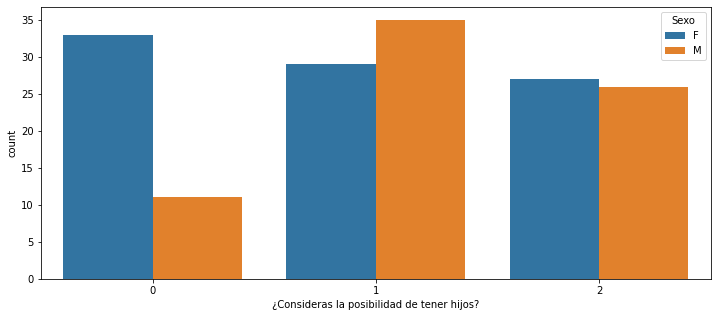

In [178]:
fig, ax = plt.subplots(figsize = [12,5])
sns.countplot(x = "¿Consideras la posibilidad de tener hijos?", hue = "Sexo", data = df_numericos)

¿Qué Sexo ha tenido más parejas formales en su vida?
---

¿Existirá alguna relación entre el número de parejas y el sentimiento de priorización por parte de la pareja?
---

¿Haber sido engañado tendrá alguna relación con el sentimiento de inseguridad?
---

¿Aburrirse facilmente tendrá alguna relación con el ser infiel?
---

¿Tener relaciones sexuales con muchas personas tiene alguna relación con haber sido infiel?
---

¿Creer en la monogámia hace que las personas sean fieles?
---

¿Qué sexo dedica más dinero a su pareja?
---

¿Existe alguna relación entre el número de horas semanales compartidas con la pareja y el dinero dedicado?
---
No hay un patrón definido. La mayoría de las parejas pasa entre 5 y 20 horas a la semana y de entre todas ellas, la maría no gasta más de $1000 en sus parejas. 

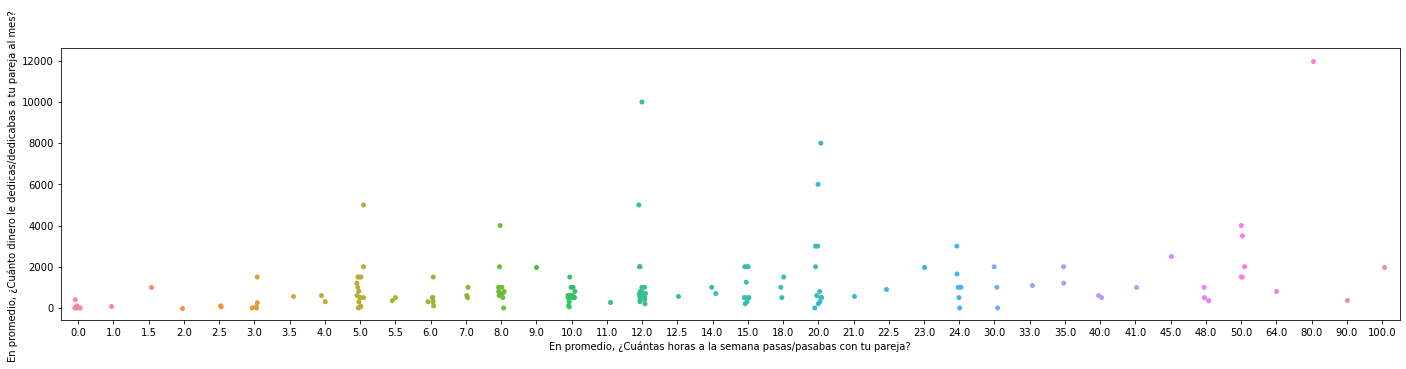

In [197]:
fig, ax = plt.subplots(figsize = [24,5])
sns.stripplot(x = "En promedio, ¿Cuántas horas a la semana pasas/pasabas con tu pareja?", y = "En promedio, ¿Cuánto dinero le dedicas/dedicabas a tu pareja al mes? ", data = df_numericos)

¿El miedo por "terminar solo" influye en el deseo de tener hijos?
---

¿El miedo a la soledad depende de la Edad?
---

¿Haber tenido experiencias de infidelidad provoca un sentimiento de querer ser infiel?
---

¿Soportar malos tratos es únicamente una característica de las personas con baja autoestima?
---

¿Regresar con una expareja está relacionado con la inestabilidad emocional?
---

¿Las personas inseguras tienen más hijos?
---

¿El número de parejas sexuales tiene que ver con un estado de ánimo disfórico?
---

¿El número de hijos deseados decrece o incrementa con respecto a la edad?
---

In [134]:
for x in df_numericos.columns:
    print(x)
    print(df_numericos[x].unique())

 ¿Qué tanto estás dispuesto a soportar maltrato físico o psicológico con tal de que una persona se quede a tu lado?
[3 1 2 5 4]
Antes de haber sido infiel, ¿a ti te fueron infiel?
[3 2 1 0]
Cuando estás en una relación, ¿Qué tan a menudo sientes de forma espontánea que la relación va a acabar?
[4 1 3 2 5]
En promedio, ¿Cuántas horas a la semana pasas/pasabas con tu pareja?
[  8.   20.   35.   12.    5.   14.    9.   18.   10.    0.   15.   30.
  12.5   3.    5.5  40.    6.   11.   48.    1.   23.    2.5   7.   50.
  90.   33.    4.    2.   24.   21.   64.   45.   80.   41.    1.5   3.5
 100.   22.5]
En promedio, ¿Cuánto dinero le dedicas/dedicabas a tu pareja al mes? 
[  800.  2000.  1200.   600.  1000.     0.   500.   700.   100.   300.
    50.  1500.   400.   350.   200.  8000.   250.  6000.  1100.  5000.
  1250.  3000.   824.  2500. 12000.  4000.  1648. 10000.  3500.   900.]
Eres buena/bueno mintiendo
[2 5 4 1 3]
Ocupación
['estudiante' 'programador' 'trabajador' 'empleado ' 'emplea